In [18]:
import os
import nltk
import json
import pandas as pd
from path import Path
%matplotlib inline
from pandas.io.json import json_normalize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
# Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv("api_key")

In [20]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [23]:

# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND BTC",
    language="en",
#    page_size=100
)

In [24]:

# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
#    page_size=100
)

In [27]:

# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.tail()

,Compound,Negative,Neutral,Positive,Text
15,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
16,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
17,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
18,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
19,0.000,0.0,1.00,0.00,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."


In [28]:

# Create the Bitcoin sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        Ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
1,0.0000,0.000,1.000,0.000,The price of Bitcoin looks to enter a new rang...
2,0.6249,0.045,0.811,0.143,"On September 15, 2020, a small group of people..."
3,-0.9081,0.347,0.607,0.046,U.S. authorities today announced criminal char...
4,0.0000,0.000,1.000,0.000,POLAND - 2020/06/15: In this photo illustratio...


In [29]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.0,20.000000,20.000000
mean,0.481650,0.0,0.914500,0.085500
std,0.113369,0.0,0.020125,0.020125
min,0.000000,0.0,0.910000,0.000000
25%,0.507000,0.0,0.910000,0.090000
50%,0.507000,0.0,0.910000,0.090000
75%,0.507000,0.0,0.910000,0.090000
max,0.507000,0.0,1.000000,0.090000


In [30]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.079355,0.040300,0.912700,0.047000
std,0.404907,0.086515,0.107157,0.054695
min,-0.908100,0.000000,0.607000,0.000000
25%,0.000000,0.000000,0.858250,0.000000
50%,0.000000,0.000000,0.934000,0.023000
75%,0.360375,0.046000,1.000000,0.080250
max,0.636900,0.347000,1.000000,0.153000


Questions:
Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

## Tokenizer
--------------------
##### In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
##### Lowercase each word
##### Remove Punctuation
##### Remove Stopwords

In [33]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [34]:
# Expand the default stop words list if necessary
addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

In [35]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words    
    sw = set(stopwords.words('english') + addl_stopwords)

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text

In [36]:

# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_df.Text]   
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
2,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
3,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [37]:

# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.000,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, read, opinion, expressed, ent..."
1,0.0000,0.000,1.000,0.000,The price of Bitcoin looks to enter a new rang...,"[price, look, enter, new, range, key, breakout..."
2,0.6249,0.045,0.811,0.143,"On September 15, 2020, a small group of people...","[september, small, group, people, worked, nigh..."
3,-0.9081,0.347,0.607,0.046,U.S. authorities today announced criminal char...,"[u, authority, today, announced, criminal, cha..."
4,0.0000,0.000,1.000,0.000,POLAND - 2020/06/15: In this photo illustratio...,"[poland, photo, illustration, logo, seen, disp..."


## NGrams and Frequency Analysis

#### In this section you will look at the ngrams and word frequency for each coin. 
#### Use NLTK to produce the n-grams for N = 2. 
#### List the top 10 words for each coin.

In [38]:
from collections import Counter
from nltk import ngrams

In [39]:

# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('satoshi', 'nakaboto'): 2,
 ('robot', 'colleague'): 1,
 ('colleague', 'satoshi'): 1,
 ('nakaboto', 'writes'): 1,
 ('writes', 'every'): 1,
 ('every', 'fucking'): 1,
 ('fucking', 'day'): 1,
 ('day', 'welcome'): 1,
 ('welcome', 'another'): 1,
 ('another', 'edition'): 1}

In [40]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(20))

{('september', 'min'): 1,
 ('min', 'read'): 1,
 ('read', 'opinion'): 1,
 ('opinion', 'expressed'): 1,
 ('expressed', 'entrepreneur'): 1,
 ('entrepreneur', 'contributor'): 1,
 ('contributor', 'founded'): 1,
 ('founded', 'five'): 1,
 ('five', 'year'): 1,
 ('year', 'ago'): 1,
 ('ago', 'platform'): 1,
 ('platform', 'native'): 1,
 ('native', 'ether'): 1,
 ('ether', 'existed'): 1,
 ('existed', 'mostly'): 1,
 ('mostly', 'char'): 1}

In [41]:

# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [42]:
# Get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('satoshi', 38),
 ('nakaboto', 38),
 ('char', 20),
 ('robot', 19),
 ('colleague', 19),
 ('writes', 19),
 ('every', 19),
 ('fucking', 19),
 ('day', 19),
 ('welcome', 19)]

In [43]:
# Get the top 10 words for Ethereum
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 20),
 ('september', 5),
 ('getty', 5),
 ('ha', 5),
 ('decentralized', 5),
 ('defi', 5),
 ('image', 3),
 ('wa', 3),
 ('may', 3),
 ('network', 3)]

## Word Clouds

###### In this section, you will generate word clouds for each coin to summarize the news for each coin

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

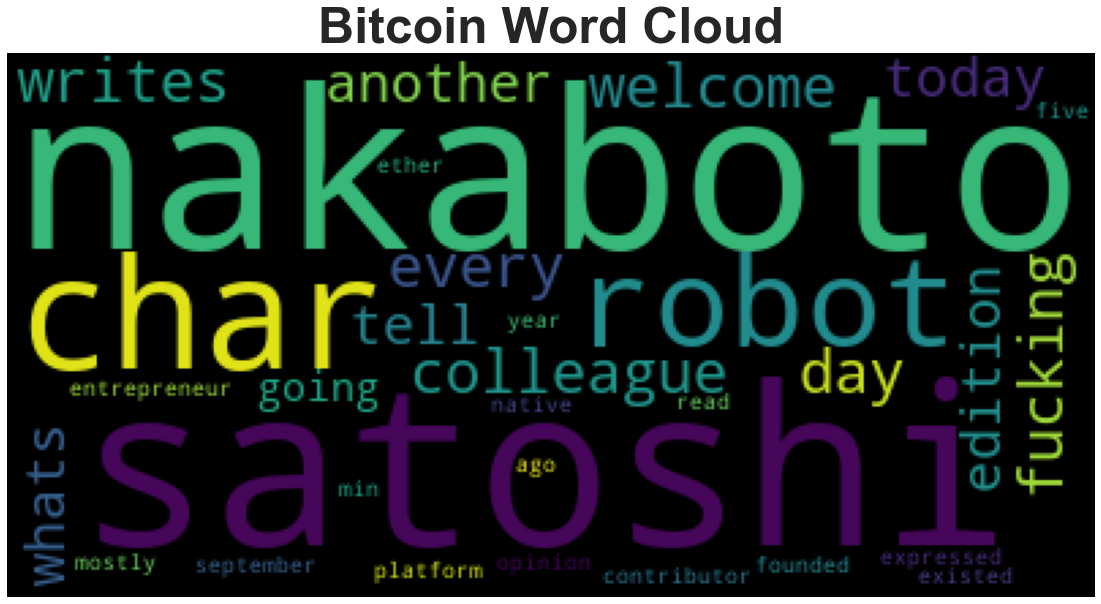

In [45]:

# Generate the Bitcoin word cloud
btc_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in btc_df.Text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

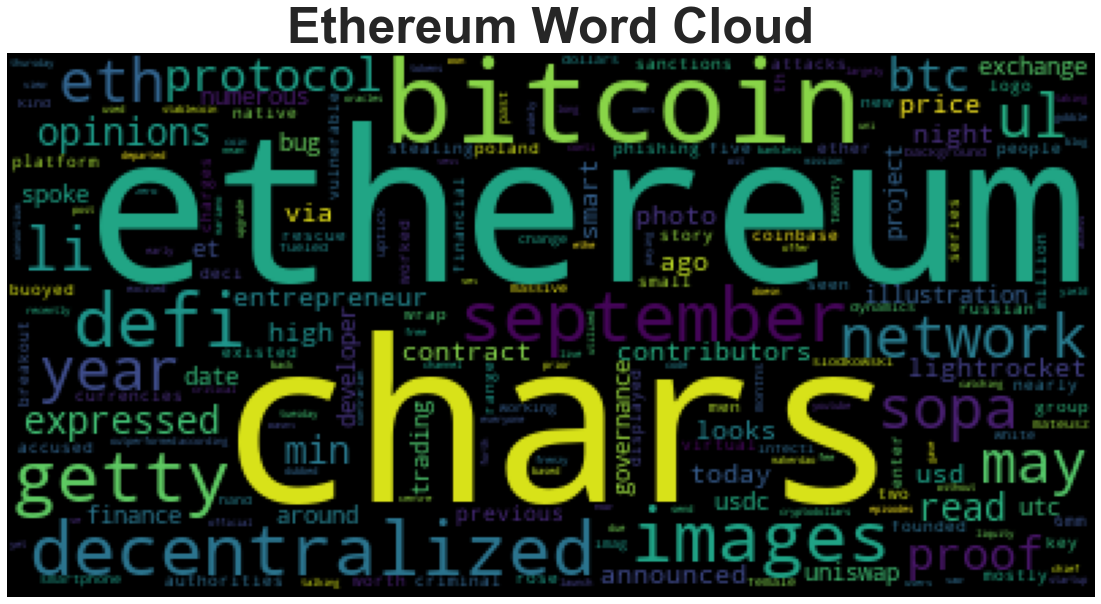

In [46]:

# Generate the Ethereum word cloud
eth_corpus = ''
for token in eth_df.Text:
    eth_corpus += token.lower()
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

## Named Entity Recognition

In [47]:
import spacy
from spacy import displacy

In [49]:

# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [50]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [51]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [52]:
# Concatenate all of the bitcoin text together
btc_corpus

'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+2989 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3061 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+2623 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+2855 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where 

In [53]:

# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)
btc_ner.user_data["title"] = "Bitcoin NER"
# Add a title to the document

In [54]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [55]:

# List all Entities
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'18, 2020',
 '6 min',
 'Bitcoin',
 'ETH',
 'Ethereum',
 'Satoshi Nakaboto',
 'Today',
 'five years ago'}

## Ethereum NER

In [56]:
# Concatenate all of the Ethereum text together
eth_corpus

'september\r\n18, 2020\r\n6 min read\r\nopinions expressed by entrepreneur contributors are their own.\r\nfounded over five years ago, the ethereum platform and its native ether (eth)\xa0have existed mostly in t… [+6239 chars]the price of bitcoin looks to enter a new range after a key breakout.\r\nsopa images/lightrocket via getty images\r\nthe price of bitcoin rose to as high as $12,086 on coinbase, as ethereum (eth) buoyed … [+3138 chars]on september 15, 2020, a small group of people worked through the night to rescue over 9.6mm usd from a vulnerable smart contract. this is our story.\r\ni was about to wrap up for the night when i deci… [+14419 chars]u.s. authorities today announced criminal charges and financial sanctions against two russian men accused of stealing nearly $17 million worth of virtual currencies in a series of phishing attacks th… [+5392 chars]poland - 2020/06/15: in this photo illustration an ethereum logo seen displayed on a smartphone. ... [+] (photo illustration 

In [57]:

# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)
eth_ner.user_data["title"] = "Ethereum NER"
# Add a title to the document

In [58]:

# Render the visualization
displacy.render(eth_ner, style='ent')

In [59]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'16, 2020',
 '18, 2020',
 '2.0',
 '20:00',
 '3,000%+ year-to-date',
 '3.4%',
 '4 p.m. et',
 '4.8%',
 '6 min',
 '80%+',
 '9.6mm',
 'around $10,669',
 'around $11,396',
 'as high as $12,086',
 'august 26, 2020 /',
 'bitcoin',
 'btc',
 'christine kim',
 'coindesk research',
 'danny ryan',
 'five years ago',
 'liz steininger',
 'makerdao',
 'mariano conti',
 'mateusz slodkowski',
 'may',
 'monday',
 'nearly $17 million',
 'one',
 'recent times',
 'russian',
 'scams',
 'september',
 'september 1',
 'september 15, 2020',
 'the bankless youtube channel',
 'the night',
 'the past few months',
 'the previous 24',
 'the previous 24 hours',
 'this week',
 'thursday',
 'today',
 'tuesday',
 'twenty dollars',
 'two',
 'wednesday',
 'working dynamics',
 'year',
 'zero'}